In [136]:
%matplotlib inline

import numpy as np    
import pandas as pd    

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from scipy.stats import zscore
from pprint import pprint

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold, cross_val_score

# 1.	Load the data (Parkinson.csv) file 

In [2]:
data = pd.read_csv('parkinson.csv')

In [3]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      
4           0.00011   0.00655   0.00908     0.01966       0.06425    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [49]:
data = data.drop(labels= "name" , axis = 1)

# b)	Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. Perform EDA and apply suitable algorithm (pick among Logistic Regression, Naive’s Bayes, KNN), which is giving best score with 70/30 validation split with precision and recall score, ROC curve and AUC value. Finally, choose the best model out of 3

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null category
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null 

In [51]:
data.dtypes

MDVP:Fo(Hz)          float64
MDVP:Fhi(Hz)         float64
MDVP:Flo(Hz)         float64
MDVP:Jitter(%)       float64
MDVP:Jitter(Abs)     float64
MDVP:RAP             float64
MDVP:PPQ             float64
Jitter:DDP           float64
MDVP:Shimmer         float64
MDVP:Shimmer(dB)     float64
Shimmer:APQ3         float64
Shimmer:APQ5         float64
MDVP:APQ             float64
Shimmer:DDA          float64
NHR                  float64
HNR                  float64
status              category
RPDE                 float64
DFA                  float64
spread1              float64
spread2              float64
D2                   float64
PPE                  float64
dtype: object

In [52]:
print(data.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [53]:
data[~data.applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 23 columns]

In [54]:
data['status'] = data.status.astype('category')
data.dtypes

MDVP:Fo(Hz)          float64
MDVP:Fhi(Hz)         float64
MDVP:Flo(Hz)         float64
MDVP:Jitter(%)       float64
MDVP:Jitter(Abs)     float64
MDVP:RAP             float64
MDVP:PPQ             float64
Jitter:DDP           float64
MDVP:Shimmer         float64
MDVP:Shimmer(dB)     float64
Shimmer:APQ3         float64
Shimmer:APQ5         float64
MDVP:APQ             float64
Shimmer:DDA          float64
NHR                  float64
HNR                  float64
status              category
RPDE                 float64
DFA                  float64
spread1              float64
spread2              float64
D2                   float64
PPE                  float64
dtype: object

In [55]:
#Lets analysze the distribution of the various attributes
data.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [56]:
# Let us look at the target column which is 'status' to understand how the data is distributed amongst the various values
data.groupby(["status"]).count()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0                48            48            48              48   
1               147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                     48        48        48          48            48   
1                    147       147       147         147           147   

        MDVP:Shimmer(dB) ...   MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  \
status                   ...                                                
0                     48 ...         48           48   48   48    48   48   
1                    147 ...        147          147  147  147   147  147   

        spread1  spread2   D2  PPE  
status                              
0            48       48   48   48  
1           147      147  147  147  

[2 rows x 22 columns]

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ASHISH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


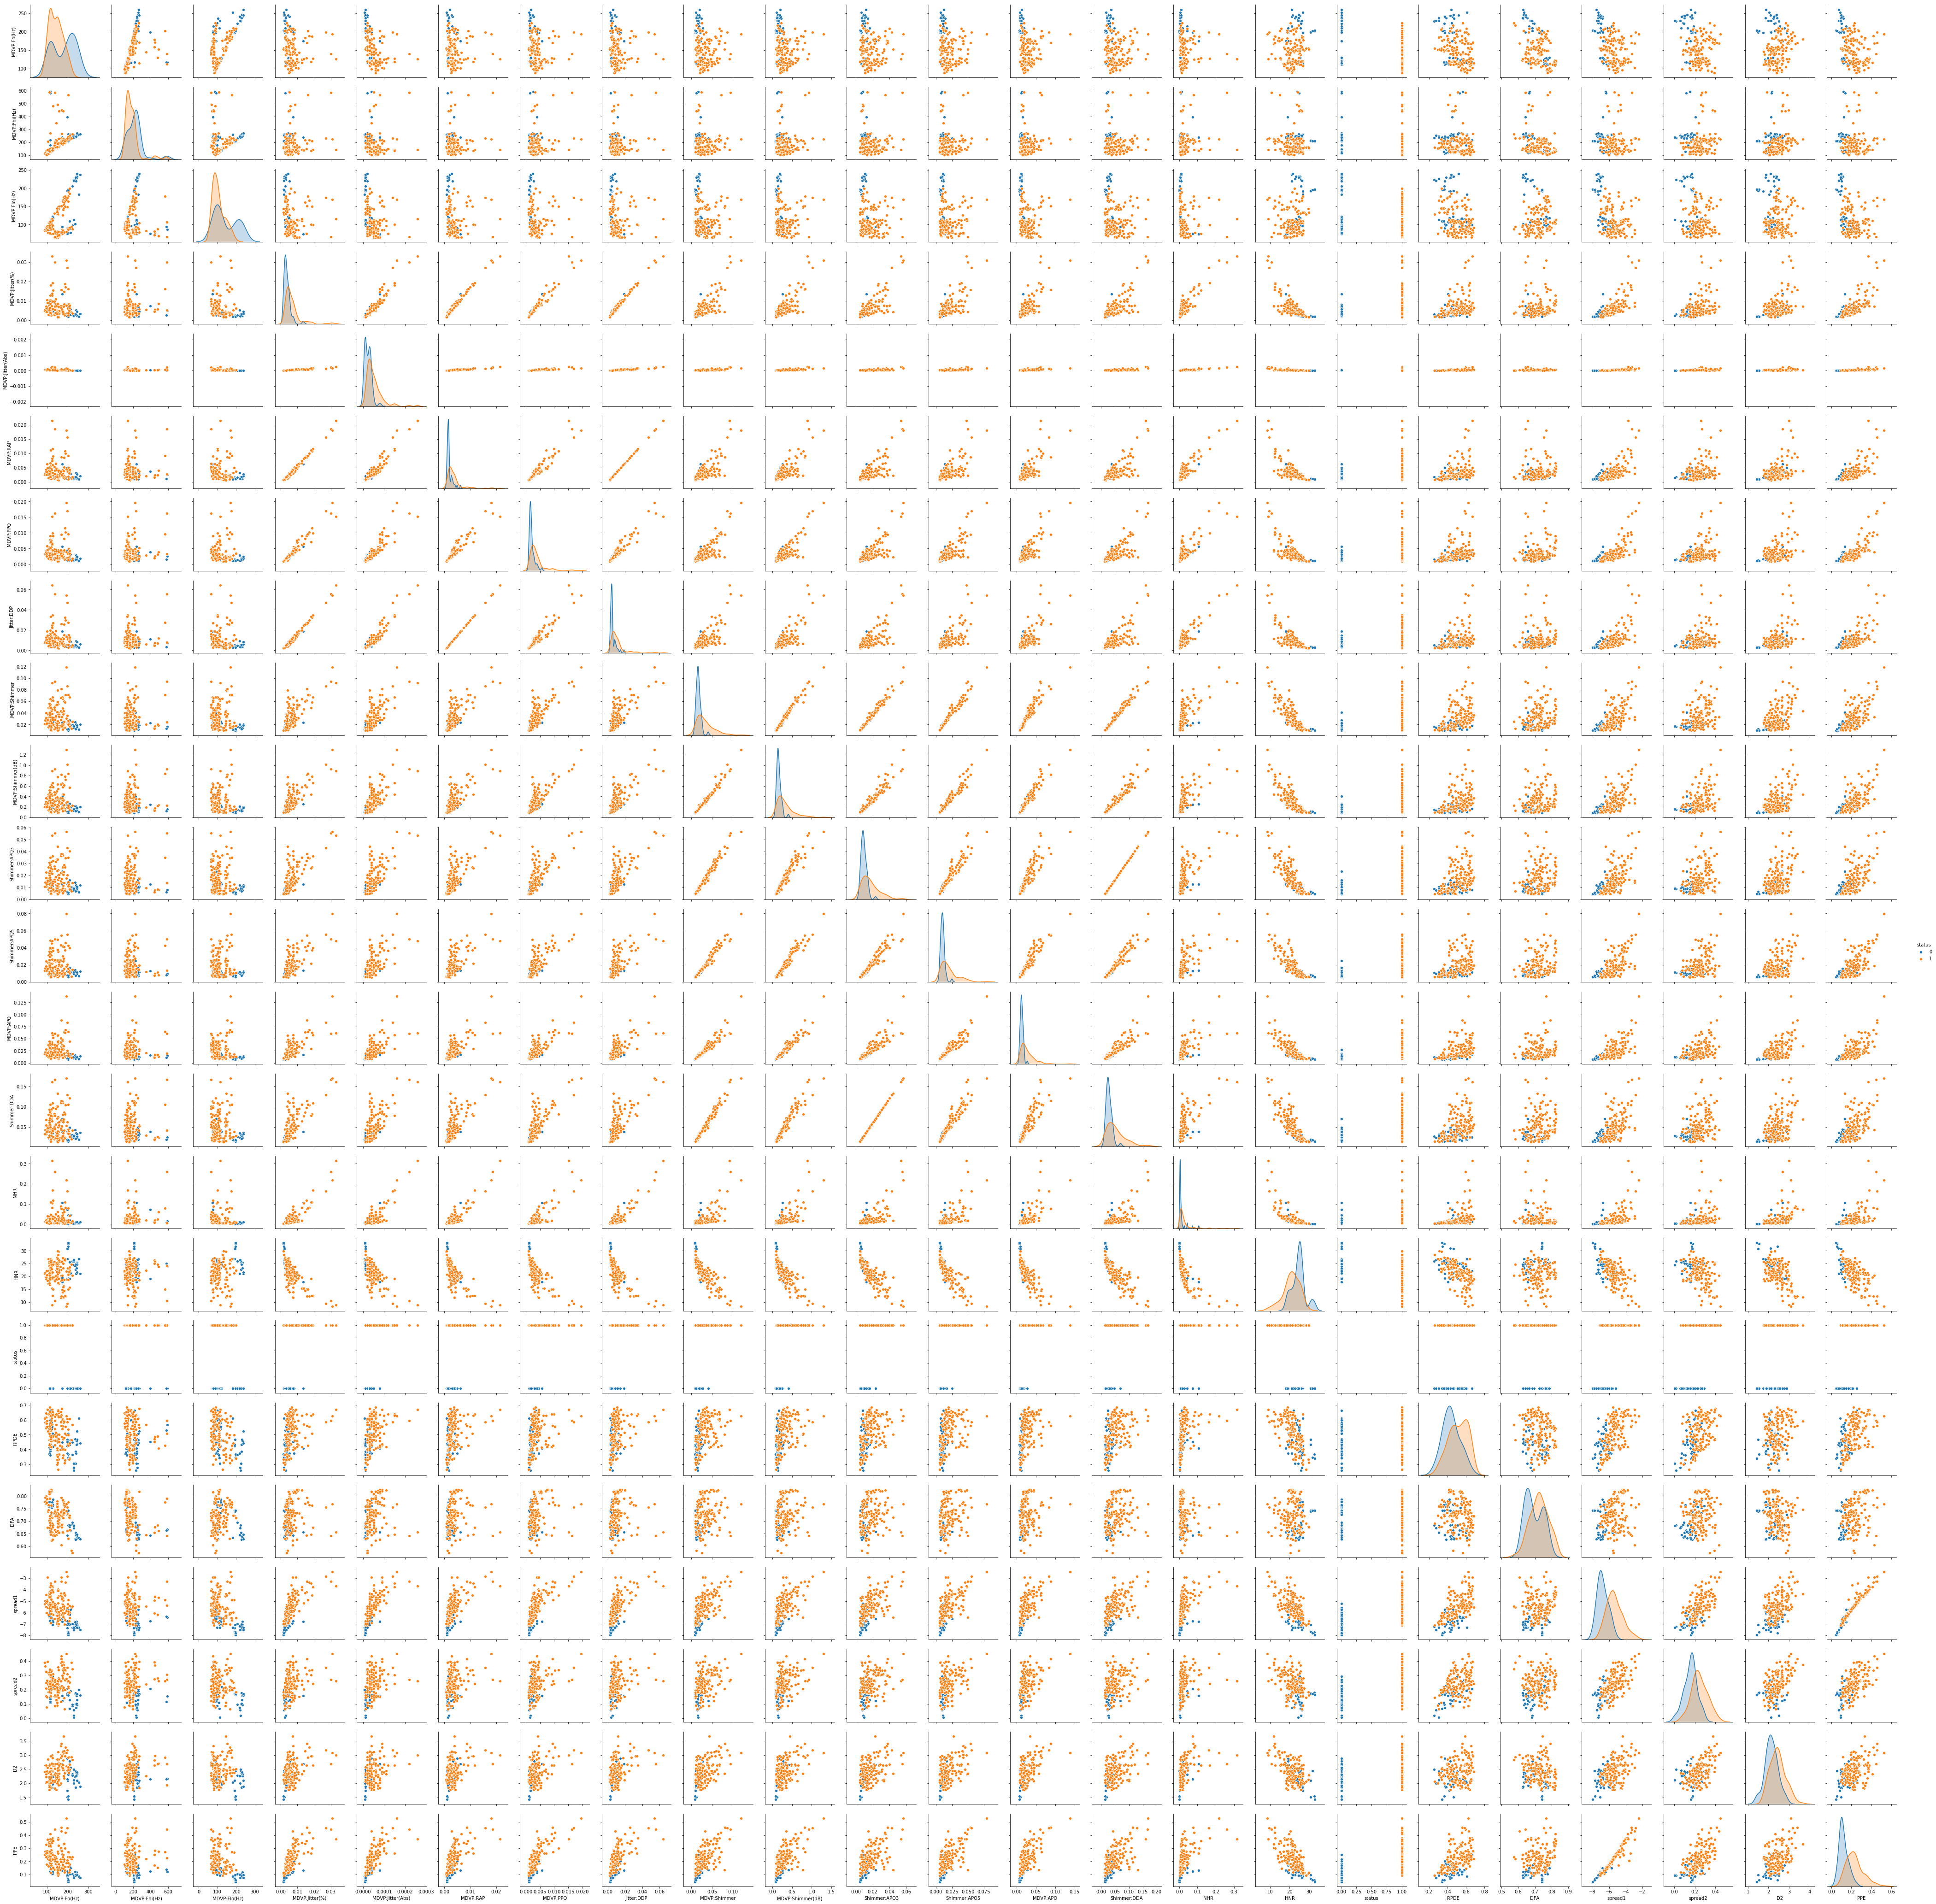

In [57]:
# Pairplot using sns
sns.pairplot(data , hue='status' , diag_kind = 'kde')

In [58]:
print("Number of observations: ", len(data))

Number of observations:  195


C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


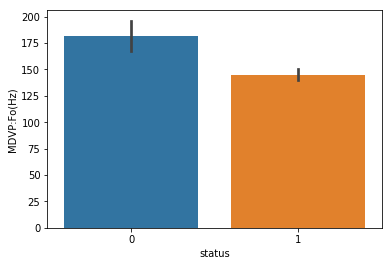

In [59]:
sns.barplot(data = data, y = 'MDVP:Fo(Hz)', x = 'status')

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


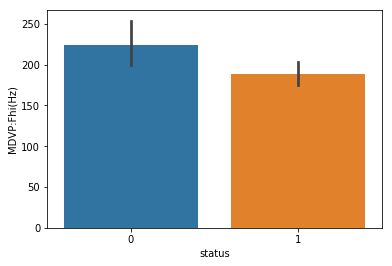

In [60]:
sns.barplot(data = data, y = 'MDVP:Fhi(Hz)', x = 'status')

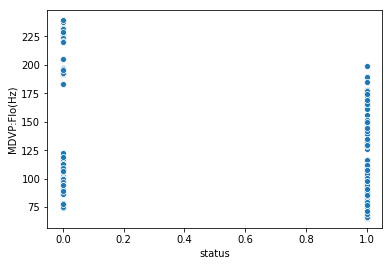

In [61]:
sns.scatterplot(data = data, y = 'MDVP:Flo(Hz)', x = 'status')

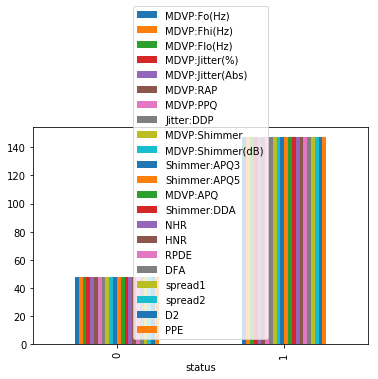

In [62]:
data.groupby(["status"]).count().plot.bar()

(array([ 7.,  5., 18., 36., 13.,  7., 10., 21.,  6., 11., 12.,  6.,  9.,
        12.,  5.,  3.,  3.,  6.,  3.,  2.]),
 array([ 88.333 ,  96.9216, 105.5102, 114.0988, 122.6874, 131.276 ,
        139.8646, 148.4532, 157.0418, 165.6304, 174.219 , 182.8076,
        191.3962, 199.9848, 208.5734, 217.162 , 225.7506, 234.3392,
        242.9278, 251.5164, 260.105 ]),
 <a list of 20 Patch objects>)

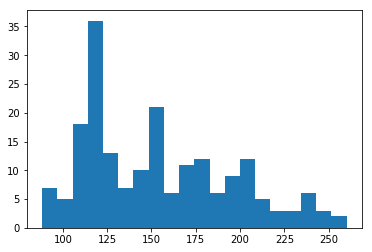

In [63]:
plt.hist(data["MDVP:Fo(Hz)"], bins = 20)

(array([25., 44., 28., 19., 31., 22., 14.,  0.,  0.,  0.,  1.,  0.,  1.,
         2.,  1.,  2.,  0.,  0.,  1.,  4.]),
 array([102.145  , 126.63925, 151.1335 , 175.62775, 200.122  , 224.61625,
        249.1105 , 273.60475, 298.099  , 322.59325, 347.0875 , 371.58175,
        396.076  , 420.57025, 445.0645 , 469.55875, 494.053  , 518.54725,
        543.0415 , 567.53575, 592.03   ]),
 <a list of 20 Patch objects>)

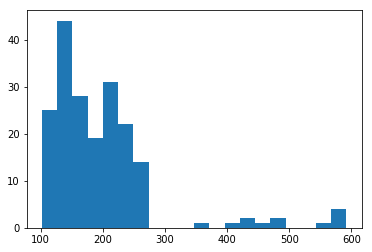

In [64]:
plt.hist(data["MDVP:Fhi(Hz)"], bins = 20)

(array([12., 33., 24., 22., 23., 21.,  3.,  6.,  6., 10.,  1.,  7.,  5.,
         2.,  5.,  3.,  1.,  2.,  4.,  5.]),
 array([ 65.476 ,  74.1607,  82.8454,  91.5301, 100.2148, 108.8995,
        117.5842, 126.2689, 134.9536, 143.6383, 152.323 , 161.0077,
        169.6924, 178.3771, 187.0618, 195.7465, 204.4312, 213.1159,
        221.8006, 230.4853, 239.17  ]),
 <a list of 20 Patch objects>)

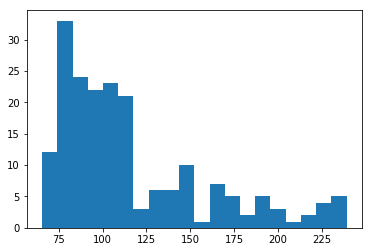

In [65]:
plt.hist(data["MDVP:Flo(Hz)"], bins = 20)

(array([41., 53., 39., 27., 11.,  8.,  0.,  4.,  3.,  2.,  2.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  2.,  1.]),
 array([0.00168 , 0.003254, 0.004828, 0.006402, 0.007976, 0.00955 ,
        0.011124, 0.012698, 0.014272, 0.015846, 0.01742 , 0.018994,
        0.020568, 0.022142, 0.023716, 0.02529 , 0.026864, 0.028438,
        0.030012, 0.031586, 0.03316 ]),
 <a list of 20 Patch objects>)

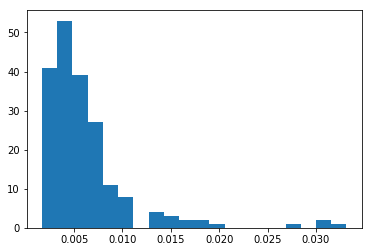

In [66]:
plt.hist(data["MDVP:Jitter(%)"], bins = 20)

(array([26., 74., 28., 17., 24.,  9.,  5.,  3.,  3.,  0.,  1.,  2.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([7.0000e-06, 1.9650e-05, 3.2300e-05, 4.4950e-05, 5.7600e-05,
        7.0250e-05, 8.2900e-05, 9.5550e-05, 1.0820e-04, 1.2085e-04,
        1.3350e-04, 1.4615e-04, 1.5880e-04, 1.7145e-04, 1.8410e-04,
        1.9675e-04, 2.0940e-04, 2.2205e-04, 2.3470e-04, 2.4735e-04,
        2.6000e-04]),
 <a list of 20 Patch objects>)

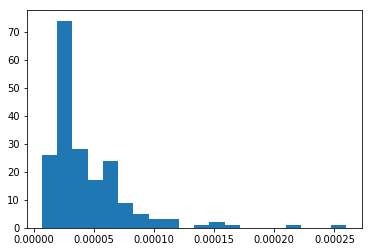

In [67]:
plt.hist(data["MDVP:Jitter(Abs)"], bins = 20)

(array([59., 51., 35., 23.,  8.,  5.,  1.,  3.,  3.,  1.,  2.,  0.,  0.,
         0.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([0.00068 , 0.001718, 0.002756, 0.003794, 0.004832, 0.00587 ,
        0.006908, 0.007946, 0.008984, 0.010022, 0.01106 , 0.012098,
        0.013136, 0.014174, 0.015212, 0.01625 , 0.017288, 0.018326,
        0.019364, 0.020402, 0.02144 ]),
 <a list of 20 Patch objects>)

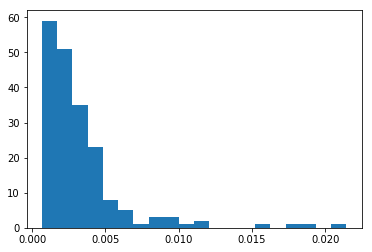

In [68]:
plt.hist(data["MDVP:RAP"], bins = 20)

(array([48., 52., 39., 25., 10.,  3.,  4.,  3.,  2.,  3.,  1.,  1.,  0.,
         0.,  0.,  1.,  1.,  1.,  0.,  1.]),
 array([0.00092 , 0.001853, 0.002786, 0.003719, 0.004652, 0.005585,
        0.006518, 0.007451, 0.008384, 0.009317, 0.01025 , 0.011183,
        0.012116, 0.013049, 0.013982, 0.014915, 0.015848, 0.016781,
        0.017714, 0.018647, 0.01958 ]),
 <a list of 20 Patch objects>)

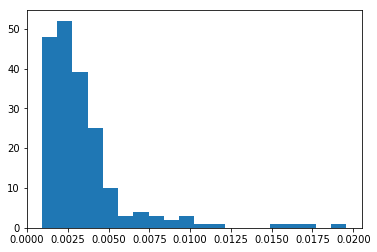

In [69]:
plt.hist(data["MDVP:PPQ"], bins = 20)

(array([59., 51., 35., 23.,  8.,  5.,  1.,  3.,  3.,  1.,  2.,  0.,  0.,
         0.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([0.00204  , 0.0051545, 0.008269 , 0.0113835, 0.014498 , 0.0176125,
        0.020727 , 0.0238415, 0.026956 , 0.0300705, 0.033185 , 0.0362995,
        0.039414 , 0.0425285, 0.045643 , 0.0487575, 0.051872 , 0.0549865,
        0.058101 , 0.0612155, 0.06433  ]),
 <a list of 20 Patch objects>)

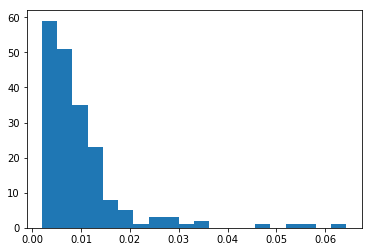

In [70]:
plt.hist(data["Jitter:DDP"], bins = 20)

(array([37., 46., 29., 16., 14., 16.,  6.,  7.,  6.,  5.,  5.,  2.,  1.,
         1.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([0.00954 , 0.015017, 0.020494, 0.025971, 0.031448, 0.036925,
        0.042402, 0.047879, 0.053356, 0.058833, 0.06431 , 0.069787,
        0.075264, 0.080741, 0.086218, 0.091695, 0.097172, 0.102649,
        0.108126, 0.113603, 0.11908 ]),
 <a list of 20 Patch objects>)

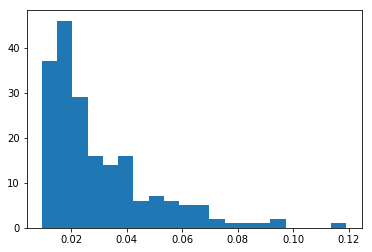

In [71]:
plt.hist(data["MDVP:Shimmer"], bins = 20)

(array([48., 41., 35., 15., 18., 10.,  6.,  4.,  5.,  4.,  1.,  2.,  2.,
         2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.085  , 0.14585, 0.2067 , 0.26755, 0.3284 , 0.38925, 0.4501 ,
        0.51095, 0.5718 , 0.63265, 0.6935 , 0.75435, 0.8152 , 0.87605,
        0.9369 , 0.99775, 1.0586 , 1.11945, 1.1803 , 1.24115, 1.302  ]),
 <a list of 20 Patch objects>)

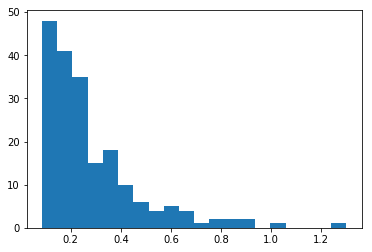

In [72]:
plt.hist(data["MDVP:Shimmer(dB)"], bins = 20)

(array([28., 44., 19., 30., 13., 11., 12.,  7.,  8.,  3.,  4.,  5.,  5.,
         1.,  1.,  1.,  0.,  0.,  1.,  2.]),
 array([0.00455 , 0.007146, 0.009742, 0.012338, 0.014934, 0.01753 ,
        0.020126, 0.022722, 0.025318, 0.027914, 0.03051 , 0.033106,
        0.035702, 0.038298, 0.040894, 0.04349 , 0.046086, 0.048682,
        0.051278, 0.053874, 0.05647 ]),
 <a list of 20 Patch objects>)

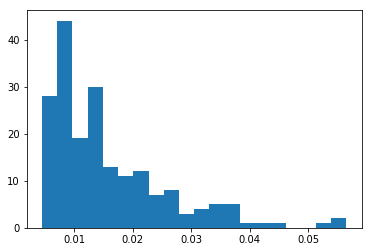

In [73]:
plt.hist(data["Shimmer:APQ3"], bins = 20)

(array([43., 49., 29., 21.,  9., 15.,  4.,  1.,  7.,  6.,  4.,  3.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0057  , 0.009385, 0.01307 , 0.016755, 0.02044 , 0.024125,
        0.02781 , 0.031495, 0.03518 , 0.038865, 0.04255 , 0.046235,
        0.04992 , 0.053605, 0.05729 , 0.060975, 0.06466 , 0.068345,
        0.07203 , 0.075715, 0.0794  ]),
 <a list of 20 Patch objects>)

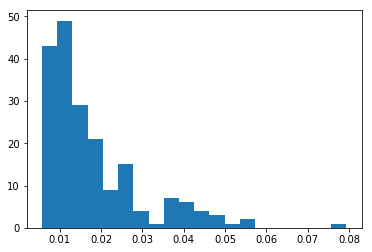

In [74]:
plt.hist(data["Shimmer:APQ5"], bins = 20)

(array([62., 50., 22., 21., 12., 12.,  4.,  3.,  5.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00719  , 0.0137195, 0.020249 , 0.0267785, 0.033308 , 0.0398375,
        0.046367 , 0.0528965, 0.059426 , 0.0659555, 0.072485 , 0.0790145,
        0.085544 , 0.0920735, 0.098603 , 0.1051325, 0.111662 , 0.1181915,
        0.124721 , 0.1312505, 0.13778  ]),
 <a list of 20 Patch objects>)

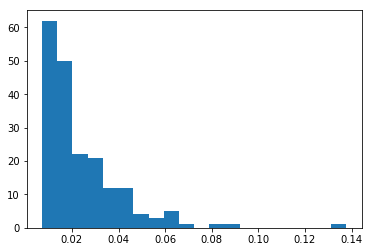

In [75]:
plt.hist(data["MDVP:APQ"], bins = 20)

(array([28., 44., 19., 30., 13., 11., 12.,  7.,  8.,  3.,  4.,  5.,  5.,
         1.,  1.,  1.,  0.,  0.,  1.,  2.]),
 array([0.01364 , 0.021429, 0.029218, 0.037007, 0.044796, 0.052585,
        0.060374, 0.068163, 0.075952, 0.083741, 0.09153 , 0.099319,
        0.107108, 0.114897, 0.122686, 0.130475, 0.138264, 0.146053,
        0.153842, 0.161631, 0.16942 ]),
 <a list of 20 Patch objects>)

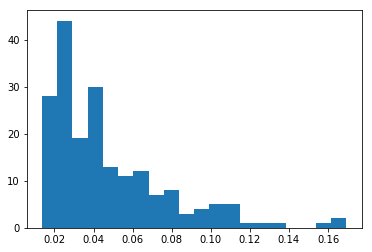

In [76]:
plt.hist(data["Shimmer:DDA"], bins = 20)

(array([115.,  46.,  12.,   5.,   4.,   3.,   4.,   1.,   0.,   0.,   2.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.00065  , 0.0163585, 0.032067 , 0.0477755, 0.063484 , 0.0791925,
        0.094901 , 0.1106095, 0.126318 , 0.1420265, 0.157735 , 0.1734435,
        0.189152 , 0.2048605, 0.220569 , 0.2362775, 0.251986 , 0.2676945,
        0.283403 , 0.2991115, 0.31482  ]),
 <a list of 20 Patch objects>)

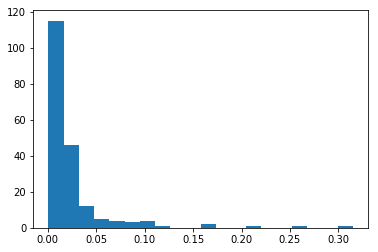

In [77]:
plt.hist(data["NHR"], bins = 20)

(array([ 3.,  1.,  2.,  4.,  3.,  6.,  3.,  8., 24., 17., 25., 19., 15.,
        26., 29.,  2.,  1.,  2.,  3.,  2.]),
 array([ 8.441 ,  9.6713, 10.9016, 12.1319, 13.3622, 14.5925, 15.8228,
        17.0531, 18.2834, 19.5137, 20.744 , 21.9743, 23.2046, 24.4349,
        25.6652, 26.8955, 28.1258, 29.3561, 30.5864, 31.8167, 33.047 ]),
 <a list of 20 Patch objects>)

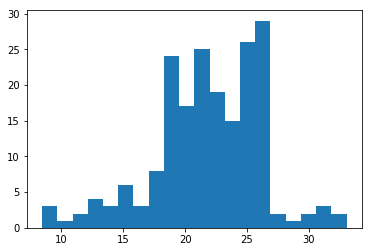

In [78]:
plt.hist(data["HNR"], bins = 20)

(array([ 3.,  1.,  4.,  8.,  5.,  9., 10., 12., 16., 19., 10., 12.,  4.,
        16., 12., 13., 10., 16.,  9.,  6.]),
 array([0.25657   , 0.27799905, 0.2994281 , 0.32085715, 0.3422862 ,
        0.36371525, 0.3851443 , 0.40657335, 0.4280024 , 0.44943145,
        0.4708605 , 0.49228955, 0.5137186 , 0.53514765, 0.5565767 ,
        0.57800575, 0.5994348 , 0.62086385, 0.6422929 , 0.66372195,
        0.685151  ]),
 <a list of 20 Patch objects>)

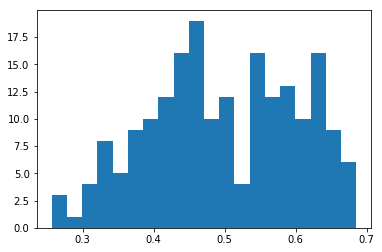

In [79]:
plt.hist(data["RPDE"], bins = 20)

(array([ 2.,  0.,  1.,  1., 10.,  9., 15., 11., 18.,  8., 10., 17., 19.,
        15., 11., 16., 10.,  7.,  2., 13.]),
 array([0.574282 , 0.5868323, 0.5993826, 0.6119329, 0.6244832, 0.6370335,
        0.6495838, 0.6621341, 0.6746844, 0.6872347, 0.699785 , 0.7123353,
        0.7248856, 0.7374359, 0.7499862, 0.7625365, 0.7750868, 0.7876371,
        0.8001874, 0.8127377, 0.825288 ]),
 <a list of 20 Patch objects>)

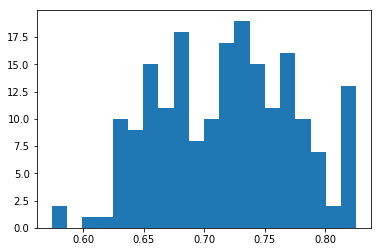

In [80]:
plt.hist(data["DFA"], bins = 20)

(array([ 3.,  3.,  9., 15., 13., 15., 18., 19., 23., 21., 10., 11., 12.,
         8.,  3.,  4.,  4.,  0.,  3.,  1.]),
 array([-7.964984  , -7.68843635, -7.4118887 , -7.13534105, -6.8587934 ,
        -6.58224575, -6.3056981 , -6.02915045, -5.7526028 , -5.47605515,
        -5.1995075 , -4.92295985, -4.6464122 , -4.36986455, -4.0933169 ,
        -3.81676925, -3.5402216 , -3.26367395, -2.9871263 , -2.71057865,
        -2.434031  ]),
 <a list of 20 Patch objects>)

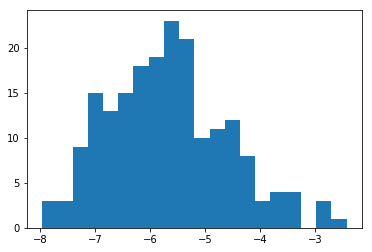

In [81]:
plt.hist(data["spread1"], bins = 20)

(array([ 2.,  0.,  3.,  7.,  7.,  6., 17., 18., 22., 25., 17., 20.,  9.,
        13.,  9.,  8.,  3.,  6.,  1.,  2.]),
 array([0.006274  , 0.02848495, 0.0506959 , 0.07290685, 0.0951178 ,
        0.11732875, 0.1395397 , 0.16175065, 0.1839616 , 0.20617255,
        0.2283835 , 0.25059445, 0.2728054 , 0.29501635, 0.3172273 ,
        0.33943825, 0.3616492 , 0.38386015, 0.4060711 , 0.42828205,
        0.450493  ]),
 <a list of 20 Patch objects>)

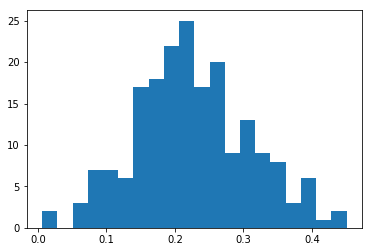

In [82]:
plt.hist(data["spread2"], bins = 20)

(array([ 2.,  1.,  1., 11., 10., 24., 20., 19., 25., 23., 18., 11.,  7.,
        10.,  6.,  3.,  2.,  1.,  0.,  1.]),
 array([1.423287 , 1.5356804, 1.6480738, 1.7604672, 1.8728606, 1.985254 ,
        2.0976474, 2.2100408, 2.3224342, 2.4348276, 2.547221 , 2.6596144,
        2.7720078, 2.8844012, 2.9967946, 3.109188 , 3.2215814, 3.3339748,
        3.4463682, 3.5587616, 3.671155 ]),
 <a list of 20 Patch objects>)

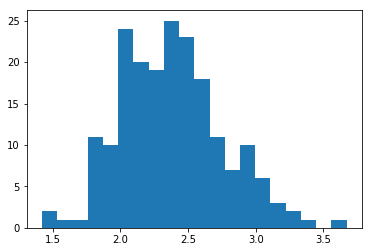

In [83]:
plt.hist(data["D2"], bins = 20)

(array([ 4.,  7., 23., 17., 21., 23., 13., 27., 18., 12.,  2.,  8.,  6.,
         7.,  0.,  3.,  2.,  1.,  0.,  1.]),
 array([0.044539 , 0.0686804, 0.0928218, 0.1169632, 0.1411046, 0.165246 ,
        0.1893874, 0.2135288, 0.2376702, 0.2618116, 0.285953 , 0.3100944,
        0.3342358, 0.3583772, 0.3825186, 0.40666  , 0.4308014, 0.4549428,
        0.4790842, 0.5032256, 0.527367 ]),
 <a list of 20 Patch objects>)

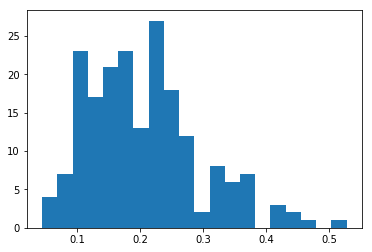

In [84]:
plt.hist(data["PPE"], bins = 20)

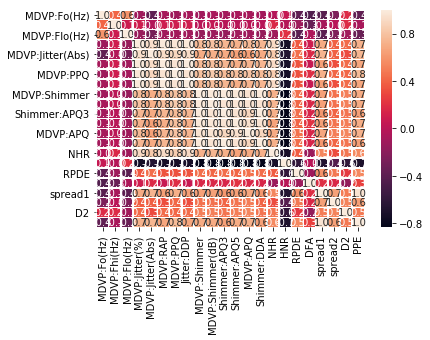

In [85]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [86]:
data.head()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     \
0   0.00370   0.00554     0.01109       0.04374             0.426    ...      
1   0.00465   0.00696     0.01394       0.06134             0.626    ...      
2   0.00544   0.00781     0.01633       0.05233             0.482    ...      
3   0.00502   0.00698     0.01505       0.05492             0.517    ...      
4   0.00655   0.00908     0.01966       0.06425             0.584    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [87]:
# ****** To be predicted *******
# Create a separate dataframe for status
data_feature_df = data.drop(labels= "status" , axis = 1)

In [88]:
data_feature_df

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14       152.845       163.305        75.836         0.00294   
15       142.167       217.455        83.159         0.00369   
16       144.188       349.259        82.764         0.00544   
17       168.778       232.181        75.603         0.00718   
18       153.046       175.829        68.623         0.00742   
19       156.405       189.398       142.822         0.00768   
20       153.848       165.738        65.782         0.00840   
21       153.880       172.860        78.128         0.00480   
22       167.930       193.221        79.068         0.00442   
23       173.917       192.735        86.180         0.00476   
24       163.656       200.841        76.779         0.00742   
25       104.400       206.002        77.968         0.00633   
26       171.041       208.313        75.501         0.00455   
27       146.845       208.701        81.737         0.00496   
28       155.358       227.383        80.055         0.00310   
29       162.568       198.346        77.630         0.00502   
..           ...           ...           ...             ...   
165      236.200       244.663       102.137         0.00277   
166      237.323       243.709       229.256         0.00303   
167      260.105       264.919       237.303         0.00339   
168      197.569       217.627        90.794         0.00803   
169      240.301       245.135       219.783         0.00517   
170      244.990       272.210       239.170         0.00451   
171      112.547       133.374       105.715         0.00355   
172      110.739       113.597       100.139         0.00356   
173      113.715       116.443        96.913         0.00349   
174      117.004       144.466        99.923         0.00353   
175      115.380       123.109       108.634         0.00332   
176      116.388       129.038       108.970         0.00346   
177      151.737       190.204       129.859         0.00314   
178      148.790       158.359       138.990         0.00309   
179      148.143       155.982       135.041         0.00392   
180      150.440       163.441       144.736         0.00396   
181      148.462       161.078       141.998         0.00397   
182      149.818       163.417       144.786         0.00336   
183      117.226       123.925       106.656         0.00417   
184      116.848       217.552        99.503         0.00531   
185      116.286       177.291        96.983         0.00314   
186      116.556       592.030        86.228         0.00496   
187      116.342       581.289        94.246         0.00267   
188      114.563       119.167        86.647         0.00327   
189      201.774       262.707        78.228         0.00694   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDV

In [89]:
data_feature_df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     \
0   0.00370   0.00554     0.01109       0.04374             0.426    ...      
1   0.00465   0.00696     0.01394       0.06134             0.626    ...      
2   0.00544   0.00781     0.01633       0.05233             0.482    ...      
3   0.00502   0.00698     0.01505       0.05492             0.517    ...      
4   0.00655   0.00908     0.01966       0.06425             0.584    ...      

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 22 columns]

In [90]:
data_feature_df_z = data_feature_df.apply(zscore) 
data_feature_df_z

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      -0.829300     -0.436165     -0.952037        0.334914   
1      -0.770972     -0.530974     -0.057721        0.715418   
2      -0.909476     -0.723168     -0.109875        0.884991   
3      -0.909622     -0.649092     -0.114229        0.775389   
4      -0.925657     -0.606245     -0.130608        1.368893   
5      -0.815735     -0.722609     -0.058458        0.715418   
6      -0.822638     -0.655962     -0.034661       -0.597735   
7      -1.135957     -0.912426     -0.276658       -0.686658   
8      -1.416988     -0.712681     -0.566017       -0.146921   
9      -1.433314     -0.843795     -0.578181       -0.186212   
10     -1.596162     -0.929959     -0.742983       -0.242047   
11     -1.509663     -0.890170     -0.691842       -0.169668   
12     -0.419115     -0.408068      0.344425       -0.680454   
13     -0.364686     -0.196872     -0.916124       -0.479862   
14     -0.033515     -0.370383     -0.932710       -0.678386   
15     -0.292164      0.222998     -0.764015       -0.523289   
16     -0.243210      1.667320     -0.773114       -0.161396   
17      0.352423      0.384367     -0.938077        0.198429   
18     -0.028647     -0.233144     -1.098871        0.248060   
19      0.052717     -0.084453      0.610402        0.301827   
20     -0.009220     -0.343722     -1.164317        0.450720   
21     -0.008445     -0.265678     -0.879911       -0.293746   
22      0.331882     -0.042560     -0.858256       -0.372328   
23      0.476903     -0.047886     -0.694422       -0.302017   
24      0.228355      0.040940     -0.910987        0.248060   
25     -1.206978      0.097495     -0.883596        0.022652   
26      0.407239      0.122819     -0.940427       -0.345445   
27     -0.178851      0.127071     -0.796772       -0.260658   
28      0.027356      0.331790     -0.835519       -0.645299   
29      0.202001      0.013600     -0.891383       -0.248250   
..           ...           ...           ...             ...   
165     1.985558      0.521146     -0.326831       -0.713541   
166     2.012759      0.510692      2.601525       -0.659774   
167     2.564598      0.743114      2.786899       -0.585328   
168     1.049815      0.224883     -0.588132        0.374205   
169     2.084894      0.526319      2.383302       -0.217231   
170     2.198474      0.823009      2.829908       -0.353716   
171    -1.009637     -0.698370     -0.244407       -0.552240   
172    -1.053431     -0.915089     -0.372858       -0.550172   
173    -0.981345     -0.883902     -0.447173       -0.564648   
174    -0.901677     -0.576823     -0.377834       -0.556376   
175    -0.941014     -0.810855     -0.177164       -0.599803   
176    -0.916598     -0.745884     -0.169424       -0.570852   
177    -0.060354     -0.075621      0.311782       -0.637027   
178    -0.131738     -0.424582      0.522127       -0.647367   
179    -0.147410     -0.450629      0.431157       -0.475726   
180    -0.091771     -0.368893      0.654494       -0.467454   
181    -0.139683     -0.394787      0.591420       -0.465386   
182    -0.106837     -0.369156      0.655646       -0.591532   
183    -0.896299     -0.801913     -0.222730       -0.424027   
184    -0.905455      0.224061     -0.387509       -0.188280   
185    -0.919069     -0.217123     -0.445560       -0.637027   
186    -0.912528      4.327631     -0.693316       -0.260658   
187    -0.917712      4.209930     -0.508611       -0.734221   
188    -0.960804     -0.854052     -0.683664       -0.610143   
189     1.151671      0.718875     -0.877607        0.148798   
190     0.483467      0.371185     -0.508265       -0.337173   
191     1.339202      0.612690     -0.618218       -0.120037   
192     0.495578      0.470104     -0.968393        1.526058   
193     1.078761      2.190044     -0.954180        0.243924   
194     1.454817      0.692246     -0.883481       -0.113833   

     MDVP:Jitter(Abs)  MDVP:RAP  MDV

In [91]:
data_labels = data["status"]
data_labels.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: category
Categories (2, int64): [0, 1]

In [92]:
data.groupby(["status"]).count()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0                48            48            48              48   
1               147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                     48        48        48          48            48   
1                    147       147       147         147           147   

        MDVP:Shimmer(dB) ...   MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  \
status                   ...                                                
0                     48 ...         48           48   48   48    48   48   
1                    147 ...        147          147  147  147   147  147   

        spread1  spread2   D2  PPE  
status                              
0            48       48   48   48  
1           147      147  147  147  

[2 rows x 22 columns]

In [93]:
# store the normalized features data into np array 
X = np.array(data_feature_df_z)
Y = np.array(data_labels)

In [94]:
X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [95]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Split the data into Train and Test

In [96]:
X_Train = X[ :134, :]
X_Test = X[135: , :]
Y_Train = Y[:134, ]
Y_Test = Y[135:, ]

In [97]:
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((134, 22), (134,), (60, 22), (60,))

### using Logistic Regression

In [98]:
logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
pred = logreg.predict(X_Test)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [100]:
print("Score of training data: ", logreg.score(X_Train, Y_Train))
print("Score of testing data: ", logreg.score(X_Test, Y_Test))

Score of training data:  0.9626865671641791
Score of testing data:  0.6833333333333333


In [101]:
print("slope: ", logreg.coef_)
print("intercept: ", logreg.intercept_)

slope:  [[-0.88140197  0.00556154 -0.61809778 -0.68830521 -0.70725055  0.50115061
   0.12341971  0.50189545  0.01932579 -0.02453107 -0.15856064  0.43292793
   0.03177489 -0.15945119 -0.13134356 -0.19271135 -0.88987938 -0.15020216
   1.40858746  0.10688193  0.42540957  0.97109709]]
intercept:  [2.83780843]


In [102]:
metrics.confusion_matrix(Y_Test, pred)

array([[ 5, 19],
       [ 0, 36]], dtype=int64)

In [103]:
print(classification_report(Y_Test, pred))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34        24
           1       0.65      1.00      0.79        36

   micro avg       0.68      0.68      0.68        60
   macro avg       0.83      0.60      0.57        60
weighted avg       0.79      0.68      0.61        60



In [104]:
score=accuracy_score(Y_Test, pred)
roc=roc_auc_score(Y_Test, pred)
print("Accuracy score: ", score)
print("roc: ", roc)

Accuracy score:  0.6833333333333333
roc:  0.6041666666666667


In [105]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(Y_Test, pred):
    fpr, tpr, threshold = metrics.roc_curve(Y_Test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

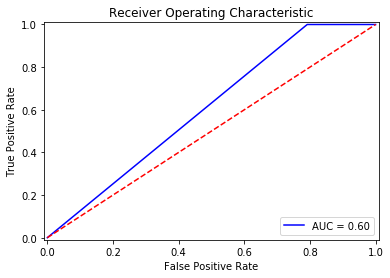

In [106]:
plot_roc_curve(Y_Test,pred)

In [107]:
model= LogisticRegression()
model.fit(X_Train, Y_Train)
expected = Y_Test
predicted = model.predict(X_Test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34        24
           1       0.65      1.00      0.79        36

   micro avg       0.68      0.68      0.68        60
   macro avg       0.83      0.60      0.57        60
weighted avg       0.79      0.68      0.61        60

[[ 5 19]
 [ 0 36]]


C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### using KNN

In [108]:
def getAccuracy(Y_Test,predicted_labels):
	correct = 0
	for x in range(len(Y_Test)):
		if Y_Test[x][-1] is predicted_labels[x]:
			correct += 1
	return (correct/float(len(Y_Test))) * 100.0

In [109]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')

In [110]:
NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [111]:
predicted_labels = NNH.predict(X_Test)

In [112]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=21)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.6666666666666666


In [114]:
NNH = KNeighborsClassifier(n_neighbors=10)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
0.8666666666666667


In [115]:
NNH = KNeighborsClassifier(n_neighbors=5)
NNH.fit(X, Y)
predicted_labels = NNH.predict(X_Test)
print(predicted_labels)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels)
print(accuracy_score_new)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0]
0.8833333333333333


In [116]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_Train, Y_Train)
expected = Y_Test
predicted = knn_model.predict(X_Test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34        24
           1       0.65      1.00      0.79        36

   micro avg       0.68      0.68      0.68        60
   macro avg       0.83      0.60      0.57        60
weighted avg       0.79      0.68      0.61        60

[[ 5 19]
 [ 0 36]]


### using Naivebayes

In [117]:
NBmodel = GaussianNB()
NBmodel.fit(X_Train, Y_Train)
expected = Y_Test
predicted = NBmodel.predict(X_Test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.77      0.42      0.54        24
           1       0.70      0.92      0.80        36

   micro avg       0.72      0.72      0.72        60
   macro avg       0.74      0.67      0.67        60
weighted avg       0.73      0.72      0.69        60

[[10 14]
 [ 3 33]]


In [118]:
accuracy_score_new = accuracy_score(Y_Test, predicted)
print(accuracy_score_new)

0.7166666666666667


## So, among the 3 models KNN is the best model because it has highest accuracy score = 88.3%

# Now,
# c)	Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.

### using AdaBoosting

In [119]:
train_set = data.head(134) # Up to the last initial training set row
test_set = data.tail(60)  #past the last initial testing set row

# capture the target column  into separate vectors for training set and test set
train_labels = train_set.pop("status")
test_labels = test_set.pop("status")


In [134]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=knn_model, n_estimators=100, random_state=1)
abcl = abcl.fit(train_set, train_labels)
test_pred = abcl.predict(test_set)

ValueError: KNeighborsClassifier doesn't support sample_weight.

In [135]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [ ]:
abcl.score(test_set , test_labels)

using knn model i am getting the above error.So, i am going with the NBmodel with boosting

In [122]:
abcl = AdaBoostClassifier(base_estimator=NBmodel, n_estimators=50, random_state=1)
abcl = abcl.fit(train_set, train_labels)
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.6833333333333333

### using GradBoosting

In [123]:
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(train_set, train_labels)
test_pred = gbcl.predict(test_set)
gbcl.score(train_set, train_labels)

1.0

In [124]:
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(train_set, train_labels)
test_pred = gbcl.predict(test_set)
gbcl.score(train_set, train_labels)

1.0

In [125]:
gbcl.score(test_set , test_labels)

0.7833333333333333

# d)	Comment on (c), whether boosting is improving the model performance or not

GradBoosting improved the model performance to 78.3%

# e)	Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score

In [126]:
data_labels = data.pop("status")

In [127]:
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True , random_state=1)
bgcl = bgcl.fit(data, data_labels)
print(bgcl.oob_score_)

0.8923076923076924


By using Baggging we got 89.2%

# f)	Comment on (e), whether bagging is improving the model performance or not.

Bagging Technique has improved the model performance to 89.2%

# g)	Compare and Contrast both bagging and boosting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.

In [128]:
from sklearn.model_selection import KFold, cross_val_score

In [133]:
for clf, label in zip([logreg,NNH,NBmodel,gbcl, bgcl], ['Logistic Regression', 'KNN', 'NaiveBayes', 'Boosting', 'Bagging']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Accuracy: 0.79 (+/- 0.12) [Logistic Regression]
Accuracy: 0.79 (+/- 0.10) [KNN]
Accuracy: 0.69 (+/- 0.07) [NaiveBayes]
Accuracy: 0.78 (+/- 0.08) [Boosting]
Accuracy: 0.78 (+/- 0.04) [Bagging]


# h)	Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

from the above i checked crossvalidation for all the models given by you,i will prefer or i will choose Bagging because accuracy is 0.78 (+/- 0.08)